In [1]:
from library_dicom.dicom_processor.model.csv_reader.CsvReader import CsvReader
from library_dicom.dicom_processor.model.csv_reader.RoiFactory import RoiFactory
import matplotlib.pyplot as plt
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder

In [2]:
from library_dicom.dicom_processor.model.NiftiBuilder import NiftiBuilder
import os
import json

from library_dicom.dicom_processor.model.Series import Series
from library_dicom.dicom_processor.model.SeriesPT import SeriesPT
from library_dicom.dicom_processor.tools.folders import get_series_path, write_json_file, remove_bi_file
from library_dicom.dicom_processor.tools.series import get_series_object


In [3]:
import numpy as np
import csv

### Build mask from roi in CSV file 

In [4]:
mask_build = MaskBuilder(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\11009101406003_apr 14_2010.csv', [144, 144, 255])


In [5]:
mask_csv = mask_build.read_csv()


In [6]:
mask_build.number_of_rois

4

(144, 144, 255)
(255, 144, 144)
(255, 144, 144)


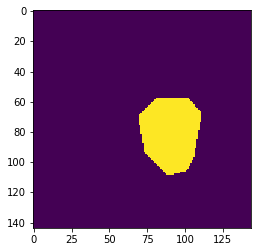

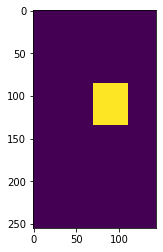

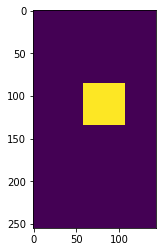

In [7]:
mask_build.show_axial_to_coronal_saggital(mask_csv, 1, 115, 72, 93 )

### Superposition Nifti/SUV au mask /Calcul SUV Mean/ SUV Max avec seuil / Comparaison avec données du CSV

In [6]:
file = r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\1.3.46.670589.28.2.12.4.9177.6631.2.448.0.1271249841' #serie PET

In [7]:
series = SeriesPT(file)

In [8]:
mask_build.calcul_suv_max_mean_mask(file)

{1: {'SUV_max': 17.81, 'SUV_mean': 10.44},
 2: {'SUV_max': 16.38, 'SUV_mean': 9.54},
 3: {'SUV_max': 10.06, 'SUV_mean': 5.98},
 4: {'SUV_max': 11.56, 'SUV_mean': 6.7}}

In [9]:
mask_build.is_correct_suv(file)

True

In [10]:
mask_build.is_calcul_sul_correct(file)

0.76398
0.76398


True

## Example 1

In [10]:
mask_build = MaskBuilder(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\Example 1\dub_er_jan 17_2013-EV.csv', [255, 255, 299])
mask_csv = mask_build.read_csv()


In [11]:
file = r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\Example 2\53011101841004 BIL SY\53011101841004 BIL SY\PET0 PET0\PT PET TAP Corrected' #serie PET

In [12]:
mask_build.calcul_suv_max_mean_mask(file)

{1: {'SUV_max': 0.04, 'SUV_mean': 0.02},
 2: {'SUV_max': 0.05, 'SUV_mean': 0.03},
 3: {'SUV_max': 0.02, 'SUV_mean': 0.01}}